In [1]:
import os, sys
sys.path.append('CommonUtils/')
import CommonUtils as cu
sys.path.append(os.environ["JUPYROOT"]) 
import RUtils as ru
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from scipy import optimize

dataXY, n_binsXY, dBinsXY = ru.hist2np(file_path="DATA/VLEDM.root", hist_path="AllStationsNoTQ/VertexExt/t>0/0<p<3600/thetay_vs_time_modg2")
df_data=cu.Profile(dataXY[0], dataXY[1], False, nbins=15, xmin=np.min(dataXY[0]),xmax=np.max(dataXY[0]), full_y=True, only_binned=True)

Welcome to JupyROOT 6.18/04
RUtils::hist2np Opening AllStationsNoTQ/VertexExt/t>0/0<p<3600/thetay_vs_time_modg2 in DATA/VLEDM.root
RUtils::hist2np Opened Name: thetay_vs_time_modg2 Title:   NbinsX: 300 <class 'float'> with 5276210 entries (exc. over/underflows)


In [2]:
N_points=len(df_data)
df_data

,bincenters,y,xerr,yerr
1,0.152301,"[-0.09845000000000001, -0.09835, -0.0976500000...",0.145026,0.000043
2,0.442353,"[-0.09975, -0.09945000000000001, -0.0994500000...",0.145026,0.000042
3,0.732404,"[-0.09915000000000002, -0.09905000000000001, -...",0.145026,0.000041
4,1.022456,"[-0.09935000000000001, -0.09915000000000002, -...",0.145026,0.000039
5,1.312507,"[-0.09995000000000001, -0.09995000000000001, -...",0.145026,0.000037
6,1.602559,"[-0.09955000000000001, -0.09805000000000001, -...",0.145026,0.000036
7,1.892610,"[-0.09995000000000001, -0.09935000000000001, -...",0.145026,0.000035
8,2.182661,"[-0.09995000000000001, -0.09965000000000002, -...",0.145026,0.000035
9,2.472713,"[-0.09995000000000001, -0.09985000000000001, -...",0.145026,0.000036
10,2.762764,"[-0.09895000000000001, -0.09875, -0.0986500000...",0.145026,0.000037


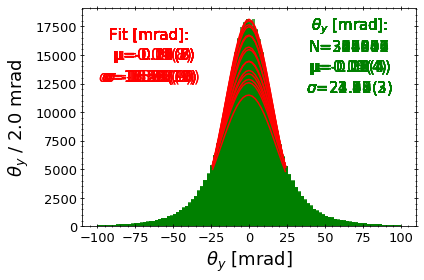

In [3]:
for i_point in range(1, N_points+1):
    
    # fit for a range of data 
    n_bins=25
    y_min, y_max=-25, +25

    # all data y_hist, range is y 
    y_hist=df_data['y'][i_point]*1e3 # rad -> mrad 
    y  = y_hist[np.logical_and(y_hist >= y_min, y_hist <= y_max)]

    #bin the data in range 
    hist, bin_edges = np.histogram(y, bins=n_bins, density=False)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    bin_width=bin_edges[1]-bin_edges[0] 
    #find the right number of bins for. all data
    n_bins_hist=int( (np.max(y_hist)-np.min(y_hist))/bin_width )  

    def gauss(x, *p): 
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))

    # fit in range 
    p0=[1, 1, 1]
    par, pcov = optimize.curve_fit(gauss, bin_centres, hist, p0=p0, absolute_sigma=False, method='trf')
    par_e = np.sqrt(np.diag(pcov))

    #plot and stats + legend 
    legend_fit=cu.legend4(par[1], par_e[1], par[2], par_e[2], prec=2)
    ax, legend = cu.plotHist(y_hist, n_bins=n_bins_hist, prec=2)
    ax.plot(bin_centres, gauss(bin_centres, *par), color="red", label='Fit')
    cu.textL(ax, 0.8, 0.78, r"$\theta_y$ [mrad]:"+"\n"+str(legend), font_size=15)
    cu.textL(ax, 0.2, 0.78, "Fit [mrad]:"+"\n"+str(legend_fit), font_size=15, color="red")
    ax.set_xlabel(r"$\theta_y$ [mrad]", fontsize=18)
    ax.set_ylabel(r"$\theta_y$ / "+str(round(bin_width))+" mrad", fontsize=18)
    plt.tight_layout()
    plt.savefig("fig/Gaus_"+str(i_point)+".png", dpi=300)
